**Important links:**

*   Cardiac arrhythmias detection in an ECG beat signal using fast fourier transform and artificial neural network (scirp.org)
https://www.scirp.org/pdf/JBiSE20110400007_26458484.pdf
*   Detection and classification of cardiovascular abnormalities using FFT based multi-objective genetic (tandfonline.com)
https://www.tandfonline.com/doi/pdf/10.1080/13102818.2017.1389303
*   Arrhythmia on ECG Classification using CNN | Kaggle
https://www.kaggle.com/code/gregoiredc/arrhythmia-on-ecg-classification-using-cnn


Number of Samples: 109446 

Number of Categories: 5

Sampling Frequency: 125Hz

Data Source: Physionet's MIT-BIH Arrhythmia Dataset

Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

-N : Non-ecotic beats (normal beat) -S : Supraventricular ectopic beats -V : Ventricular ectopic beats -F : Fusion Beats -Q : Unknown Beats

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')


In [1]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/file/d/16QQSUg6d1bzTggFzr0U7iCowMwKlhqJ9/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('mitbih_test.csv') 
 
test_df = pd.read_csv('mitbih_test.csv', header=None)
#print(test_df)

In [6]:
link = 'https://drive.google.com/file/d/13MgE_c7uHySC5Im4Ed3348lHTovVmX79/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('mitbih_train.csv') 
 
train_df = pd.read_csv('mitbih_train.csv', header=None)
#train_df

In [7]:
#New data for evaluating the trained network:
link = 'https://drive.google.com/file/d/1CKRsqXfqiWx56c1KhWsVgmHriWb8C0rc/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('ptbdb_abnormal') 
 
abnormal = pd.read_csv('ptbdb_abnormal', header=None)

In [8]:
#New data for evaluating the trained network:
link = 'https://drive.google.com/file/d/1F979EE1n_anlGn40nSeGwHCHhcrAHuOf/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('ptbdb_normal') 
 
normal = pd.read_csv('ptbdb_normal', header=None)

In [ ]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


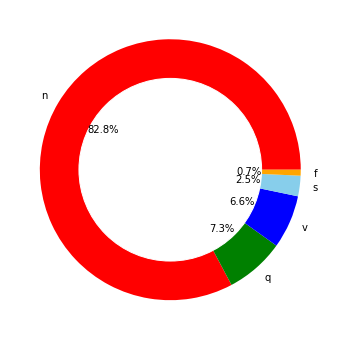

In [ ]:
plt.figure(figsize=(12,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [9]:
from sklearn.utils import resample
import random
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
#To fix the error when loading df_0: "Cannot take a larger sample than population when 'replace=False'", add: "replace = True"
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42, replace = True)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
equilibre=train_df[187].value_counts()
print(equilibre)


0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


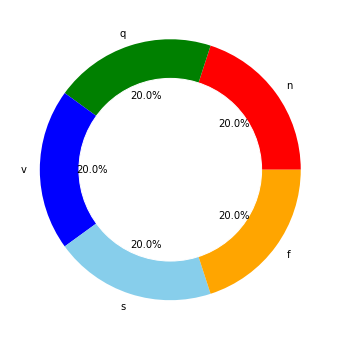

In [ ]:
plt.figure(figsize=(12,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [10]:
 c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [ ]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10719,0.867159,0.976015,0.629151,0.149446,0.025830,0.012915,0.003690,0.000000,0.014760,0.064576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74619,1.000000,0.954386,0.361403,0.056140,0.094737,0.147368,0.143860,0.161404,0.224561,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78730,0.914747,0.900922,0.799539,0.668203,0.483871,0.449309,0.403226,0.465438,0.550691,0.327189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80797,1.000000,0.813124,0.504993,0.188302,0.000000,0.081312,0.106990,0.077033,0.079886,0.074180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
87384,1.000000,0.517606,0.542253,0.542253,0.517606,0.500000,0.492958,0.447183,0.323944,0.225352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [11]:
#To transform the time to the correct unit in the plots:
#Remember that the sample frequency is 125Hz
Column_seconds = np.arange(0,188.0/125,(188.0/125)/188)
len(Column_seconds)
c.columns = Column_seconds

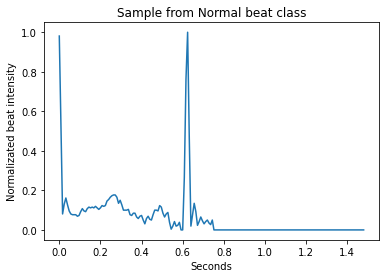

In [19]:
plt.plot(c.iloc[0,:186])
plt.xlabel('Seconds')
plt.ylabel('Normalizated beat intensity')
plt.title('Sample from Normal beat class')
plt.show()

In [17]:
#Function to plot the colorbar
def fct():
    f = plt.figure()
    ax = f.add_subplot(111)
    x, y = np.mgrid[0:1,0:1]
    z = x
    mesh = ax.pcolormesh(x, y ,z, cmap='jet')

    return ax, mesh

#Function to create the histogram to see the general behaviour in the ST segment
#of each class
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

def plot_hist_newnormal(class_number,size,min_,bins):
    img=normal.loc[normal[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

def plot_hist_newabnormal(class_number,size,min_,bins):
    img=abnormal.loc[abnormal[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()    

1300000
1300000


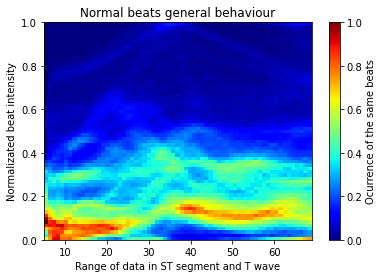

In [20]:
ax, mesh = fct()
plt.colorbar(mesh, ax=ax, label = 'Ocurrence of the same beats')
plt.xlabel('Range of data in ST segment and T wave')
plt.ylabel('Normalizated beat intensity')
plt.title('Normal beats general behaviour')
plot_hist(0,70,5,65)

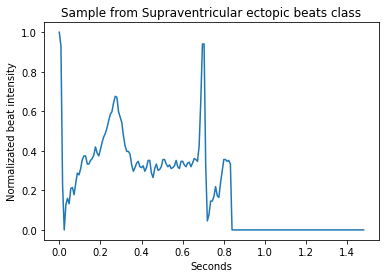

In [21]:
plt.plot(c.iloc[1,:186])
plt.xlabel('Seconds')
plt.ylabel('Normalizated beat intensity')
plt.title('Sample from Supraventricular ectopic beats class')
plt.show()

900000
900000


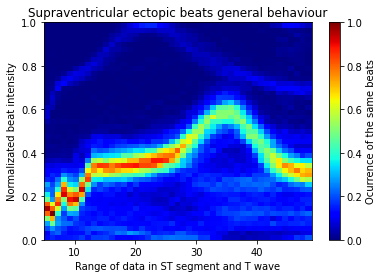

In [22]:
ax, mesh = fct()
plt.colorbar(mesh, ax=ax, label = 'Ocurrence of the same beats')
plt.xlabel('Range of data in ST segment and T wave')
plt.ylabel('Normalizated beat intensity')
plt.title('Supraventricular ectopic beats general behaviour')
plot_hist(1,50,5,45)

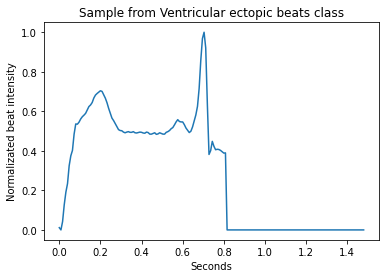

In [23]:
plt.plot(c.iloc[2,:186])
plt.xlabel('Seconds')
plt.ylabel('Normalizated beat intensity')
plt.title('Sample from Ventricular ectopic beats class')
plt.show()

900000
900000


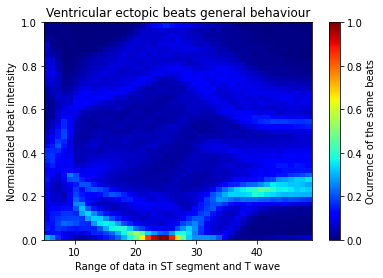

In [24]:
ax, mesh = fct()
plt.colorbar(mesh, ax=ax, label = 'Ocurrence of the same beats')
plt.xlabel('Range of data in ST segment and T wave')
plt.ylabel('Normalizated beat intensity')
plt.title('Ventricular ectopic beats general behaviour')
plot_hist(2,50,5,45)

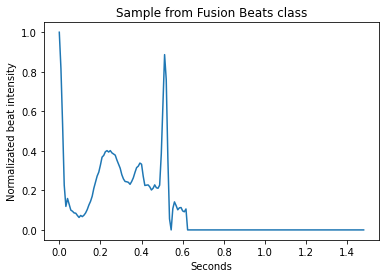

In [25]:
plt.plot(c.iloc[3,:186])
plt.xlabel('Seconds')
plt.ylabel('Normalizated beat intensity')
plt.title('Sample from Fusion Beats class')
plt.show()

900000
900000


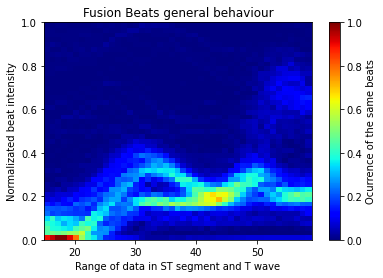

In [31]:
ax, mesh = fct()
plt.colorbar(mesh, ax=ax, label = 'Ocurrence of the same beats')
plt.xlabel('Range of data in ST segment and T wave')
plt.ylabel('Normalizated beat intensity')
plt.title('Fusion Beats general behaviour')
plot_hist(3,60,15,45)

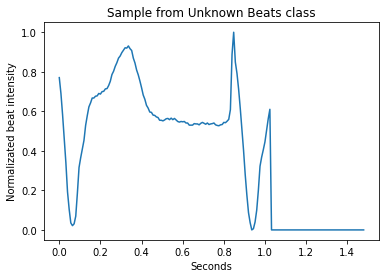

In [32]:
plt.plot(c.iloc[4,:186])
plt.xlabel('Seconds')
plt.ylabel('Normalizated beat intensity')
plt.title('Sample from Unknown Beats class')
plt.show()

700000
700000


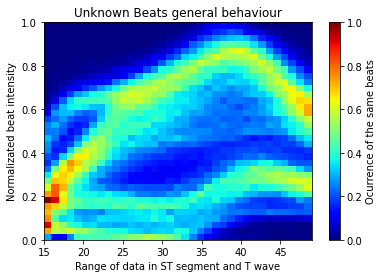

In [33]:
ax, mesh = fct()
plt.colorbar(mesh, ax=ax, label = 'Ocurrence of the same beats')
plt.xlabel('Range of data in ST segment and T wave')
plt.ylabel('Normalizated beat intensity')
plt.title('Unknown Beats general behaviour')
plot_hist(4,50,15,35)

262990
262990


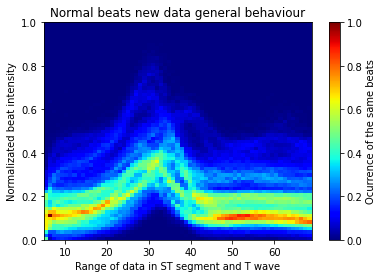

In [34]:
ax, mesh = fct()
plt.colorbar(mesh, ax=ax, label = 'Ocurrence of the same beats')
plt.xlabel('Range of data in ST segment and T wave')
plt.ylabel('Normalizated beat intensity')
plt.title('Normal beats new data general behaviour')
plot_hist_newnormal(0,70,5,65)

472770
472770


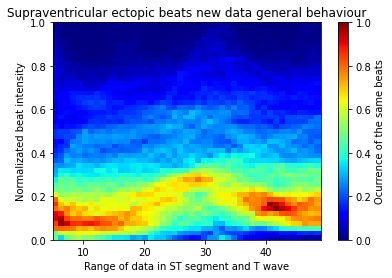

In [30]:
ax, mesh = fct()
plt.colorbar(mesh, ax=ax, label = 'Ocurrence of the same beats')
plt.xlabel('Range of data in ST segment and T wave')
plt.ylabel('Normalizated beat intensity')
plt.title('Supraventricular ectopic beats new data general behaviour')
plot_hist_newabnormal(1,50,5,45)

#Starting to organize the data for the CNN, also training and testing

In [ ]:
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
#ImportError: cannot import name 'BatchNormalization' from 'keras.layers.normalization' 
#(/usr/local/lib/python3.7/dist-packages/keras/layers/normalization/__init__.py)
# Solving: from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
#from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 164s 52ms/step - loss: 0.1809 - accuracy: 0.9354 - val_loss: 0.1494 - val_accuracy: 0.9493
Epoch 2/40
3125/3125 [==============================] - 145s 46ms/step - loss: 0.0706 - accuracy: 0.9756 - val_loss: 0.1471 - val_accuracy: 0.9591
Epoch 3/40
3125/3125 [==============================] - 114s 37ms/step - loss: 0.0467 - accuracy: 0.9846 - val_loss: 0.1355 - val_accuracy: 0.9598
Epoch 4/40
3125/3125 [==============================] - 117s 37ms/step - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.1358 - val_accuracy: 0.9621
Epoch 5/40
3125/3125 [==============================] - 116s 37ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.1189 - val_accuracy: 0.9740
Epoch 6/40
3125/3125 [==============================] - 116s 37ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.1662 - val_accuracy: 0.9616
Epoch 7/40
3125/3125 [==============================] - 116s 37ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0

Accuracy: 97.40%


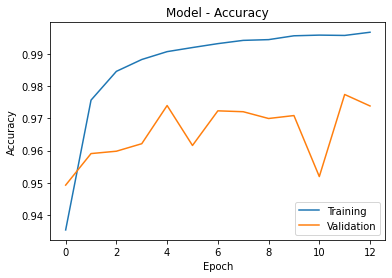

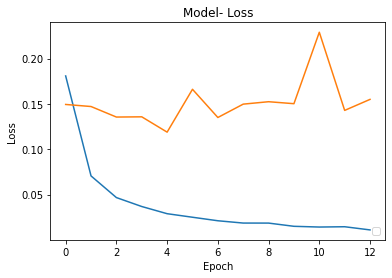

In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)
plt.show()

In [ ]:
#from : https://www.kaggle.com/coni57/model-from-arxiv-1805-00794
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


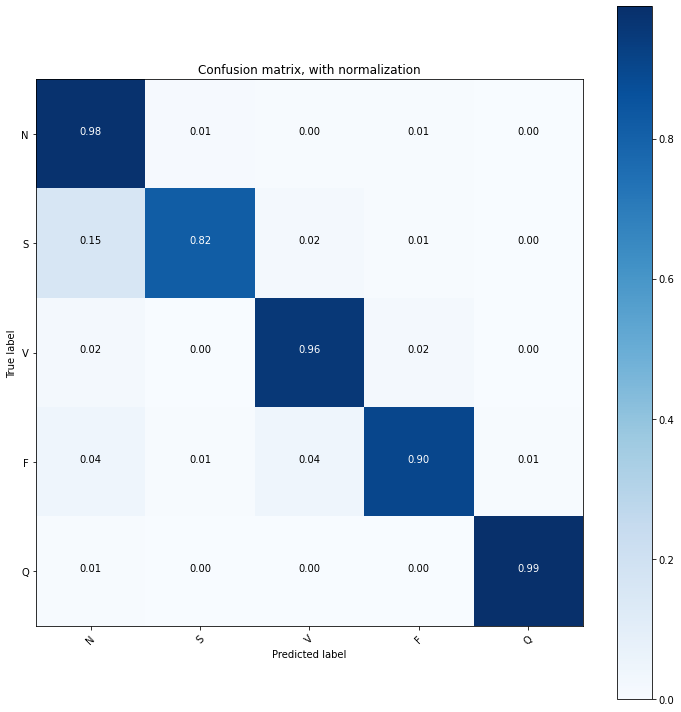

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

Now, using the data sets from Kaggle (originally from MIT-BIH arrhythmia dataset) I'll test the network.

In [ ]:
#Preparing the data for runing the network 
X_newdatanormal=normal.iloc[:,:186].values
X_newdata_abnormal=abnormal.iloc[:,:186].values



X_newdatanormal = X_newdatanormal.reshape(len(X_newdatanormal), X_newdatanormal.shape[1],1)
X_newdata_abnormal = X_newdata_abnormal.reshape(len(X_newdata_abnormal), X_newdata_abnormal.shape[1],1)

In [ ]:
#NOW, to the network!!!
newdata_prediction_normal= model.predict(X_newdatanormal)
datapredictionnormal=newdata_prediction_normal.astype(int)

newdata_prediction_abnormal = model.predict(X_newdata_abnormal)
dataprediction_abnormal =newdata_prediction_abnormal.astype(int)


In [ ]:
#How many the network predict right? (class 0, normal beats)
count_correctnormal = 0
for i in range(len(datapredictionnormal)):
  if datapredictionnormal[i][0]==0:
    count_correctnormal += 1

count_correct1 = 0

for i in range(len(dataprediction_abnormal)):
  if dataprediction_abnormal[i][0]==0:
    count_correct1 += 1

print("From ",len(normal),"data, the network classified correct as normal beats: ", count_correctnormal)
percentagecorrectnormal = count_correctnormal*100/len(datapredictionnormal)
percentagecorrectnormal = round(percentagecorrectnormal,2)
print("This is a percentage of success of: ",percentagecorrectnormal,"%" )

print("From ",len(abnormal),"data, the network classified correct as supraventricular ectopic beats: ", count_correct1)
percentagecorrect1 = count_correct1*100/len(dataprediction_abnormal)
percentagecorrect1 = round(percentagecorrect1,2)
print("This is a percentage of success of: ",percentagecorrect1,"%" )

From  4046 data, the network classified correct as normal beats:  2851
This is a percentage of success of:  70.46 %
From  10506 data, the network classified correct as supraventricular ectopic beats:  8292
This is a percentage of success of:  78.93 %


## Now, we are going to take the Fast Fourier Transform to the ST segment of the data and calculate the area under the curve of the FFT, to add this as a new parameter and analyze if this improves the accuracy

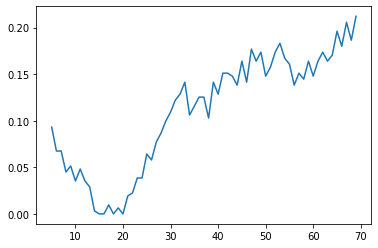

In [ ]:
#First cheking in one data that it works fine:
test_1 = train_df.iloc[0,5:70:1]
test_1.plot()

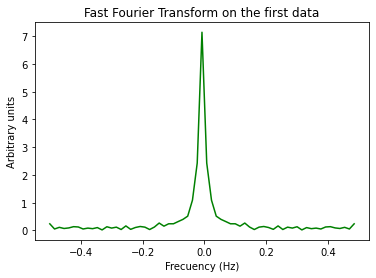

In [ ]:
#aplying FFT
dt_test_1 = 65/len(test_1)
t1 = np.arange(0, 65, dt_test_1)
test_1_ft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(test_1)))*dt_test_1
freq1 = np.arange(-1/(2*dt_test_1),1/(2*dt_test_1),1/(dt_test_1*t1.size)) 

plt.plot(freq1,abs(test_1_ft),color='green')
plt.title('Fast Fourier Transform on the first data')
plt.ylabel('Arbitrary units')
plt.xlabel('Frecuency (Hz)')
plt.show()

In [ ]:
#Area under the curve
from numpy import trapz
area1 = trapz(abs(test_1_ft), dx=dt_test_1)
area1

22.65856960517597

In [ ]:
#Now for all the data:
#First for train_df
from numpy import trapz
FFT_area = []

#For class 0: Normal beats
class_0 = train_df.iloc[0,5:70:1]
dt_0 = 65/len(class_0)
t0 = np.arange(0, 65, dt_0)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 0):
     data0 = train_df.iloc[i,5:70:1]
     fft_data0 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data0)))*dt_0
     freq_data0 = np.arange(-1/(2*dt_0),1/(2*dt_0),1/(dt_0*t0.size)) 
     area_data0 = trapz(abs(fft_data0), dx=dt_0)
     FFT_area.append(area_data0)
print("clase 0:", len(FFT_area))

#For class 1: Supraventricular ectopic beats
class_1 = train_df.iloc[20001,5:50:1]
dt_1 = 45/len(class_1)
t1 = np.arange(0, 45, dt_1)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 1):
     data1 = train_df.iloc[i,5:50:1]
     fft_data1 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data1)))*dt_1
     freq_data1 = np.arange(-1/(2*dt_1),1/(2*dt_1),1/(dt_1*t1.size)) 
     area_data1 = trapz(abs(fft_data1), dx=dt_1)
     FFT_area.append(area_data1)
print("clase 1:", len(FFT_area))

#For class 2: Ventricular ectopic beats 
class_2 = train_df.iloc[40001,5:50:1]
dt_2= 45/len(class_2)
t2 = np.arange(0, 45, dt_2)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 2):
     data2 = train_df.iloc[i,5:50:1]
     fft_data2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data2)))*dt_2
     freq_data2 = np.arange(-1/(2*dt_2),1/(2*dt_2),1/(dt_2*t2.size)) 
     area_data2 = trapz(abs(fft_data2), dx=dt_2)
     FFT_area.append(area_data2)
print("clase 2:", len(FFT_area))

#For class 3: Fusion Beats
class_3 = train_df.iloc[60001,15:60:1]
dt_3= 45/len(class_3)
t3 = np.arange(0, 45, dt_3)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 3):
     data3 = train_df.iloc[i,15:60:1]
     fft_data3 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data3)))*dt_3
     freq_data3 = np.arange(-1/(2*dt_3),1/(2*dt_3),1/(dt_3*t3.size)) 
     area_data3 = trapz(abs(fft_data3), dx=dt_3)
     FFT_area.append(area_data3)
print("clase 3:", len(FFT_area))


#For class 4: Unknown Beats
class_4 = train_df.iloc[80001,15:50:1]
dt_4= 35/len(class_4)
t4 = np.arange(0, 35, dt_4)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 4):
     data4 = train_df.iloc[i,15:50:1]
     fft_data4 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data4)))*dt_4
     freq_data4 = np.arange(-1/(2*dt_4),1/(2*dt_4),1/(dt_4*t4.size)) 
     area_data4 = trapz(abs(fft_data4), dx=dt_4)
     FFT_area.append(area_data4)

print("clase 4:", len(FFT_area))

clase 0: 20000
clase 1: 40000
clase 2: 60000
clase 3: 80000
clase 4: 100000


In [ ]:
#Adding the parameter to a new set of data for training, it has to be addded before 
#the column of classes, i.e. it will be the new column 187
train_df_FFTarea = train_df.copy() # .copy() needs to be added so that the original dataframe doesn't change
train_df_FFTarea.insert(187, '187', FFT_area)

#We have to modify the name of the columns, because after the last change the columns 188 and 189 have the names
#188 and 187 respectively
Names_column = np.arange(189)
train_df_FFTarea.columns = Names_column
#train_df_FFTarea

In [ ]:
#Now for test_df
FFT_area_test = []

#For class 0: Normal beats
class_0 = train_df.iloc[0,5:70:1]
dt_0 = 65/len(class_0)
t0 = np.arange(0, 65, dt_0)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 0):
     data0_test = test_df.iloc[i,5:70:1]
     fft_data0_test = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data0_test)))*dt_0
     freq_data0_test = np.arange(-1/(2*dt_0),1/(2*dt_0),1/(dt_0*t0.size)) 
     area_data0_test = trapz(abs(fft_data0_test), dx=dt_0)
     FFT_area_test.append(area_data0_test)
print("clase 0:", len(FFT_area_test))

#For class 1: Supraventricular ectopic beats
class_1 = train_df.iloc[20001,5:50:1]
dt_1 = 45/len(class_1)
t1 = np.arange(0, 45, dt_1)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 1):
     data1_test = test_df.iloc[i,5:50:1]
     fft_data1_test = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data1_test)))*dt_1
     freq_data1_test = np.arange(-1/(2*dt_1),1/(2*dt_1),1/(dt_1*t1.size)) 
     area_data1_test = trapz(abs(fft_data1_test), dx=dt_1)
     FFT_area_test.append(area_data1_test)
print("clase 1:", len(FFT_area_test))

#For class 2: Ventricular ectopic beats 
class_2 = train_df.iloc[40001,5:50:1]
dt_2= 45/len(class_2)
t2 = np.arange(0, 45, dt_2)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 2):
     data2_test = test_df.iloc[i,5:50:1]
     fft_data2_test = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data2_test)))*dt_2
     freq_data2_test = np.arange(-1/(2*dt_2),1/(2*dt_2),1/(dt_2*t2.size)) 
     area_data2_test = trapz(abs(fft_data2_test), dx=dt_2)
     FFT_area_test.append(area_data2_test)
print("clase 2:", len(FFT_area_test))

#For class 3: Fusion Beats
class_3 = train_df.iloc[60001,15:60:1]
dt_3= 45/len(class_3)
t3 = np.arange(0, 45, dt_3)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 3):
     data3_test = test_df.iloc[i,15:60:1]
     fft_data3_test = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data3_test)))*dt_3
     freq_data3_test = np.arange(-1/(2*dt_3),1/(2*dt_3),1/(dt_3*t3.size)) 
     area_data3_test = trapz(abs(fft_data3_test), dx=dt_3)
     FFT_area_test.append(area_data3_test)
print("clase 3:", len(FFT_area_test))


#For class 4: Unknown Beats
class_4 = train_df.iloc[80001,15:50:1]
dt_4= 35/len(class_4)
t4 = np.arange(0, 35, dt_4)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 4):
     data4_test = test_df.iloc[i,15:50:1]
     fft_data4_test = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data4_test)))*dt_4
     freq_data4_test = np.arange(-1/(2*dt_4),1/(2*dt_4),1/(dt_4*t4.size)) 
     area_data4_test = trapz(abs(fft_data4_test), dx=dt_4)
     FFT_area_test.append(area_data4_test)

print("clase 4:", len(FFT_area_test))

clase 0: 18118
clase 1: 18674
clase 2: 20122
clase 3: 20284
clase 4: 21892


In [ ]:
#Adding the parameter to a new set of data for testing, it has to be addded before 
#the column of classes, i.e. it will be the new column 187
test_df_FFTarea = test_df.copy() # .copy() needs to be added so that the original dataframe doesn't change
test_df_FFTarea.insert(187, '187', FFT_area_test)

#We have to modify the name of the columns, because after the last change the columns 188 and 189 have the names
#188 and 187 respectively
Names_column = np.arange(189)
test_df_FFTarea.columns = Names_column

In [ ]:
#Preparing the data for runing the network again with the new parameter
#Now the classes are in column '188'
target_train_FFTarea=train_df_FFTarea[188]
target_test_FFTarea=test_df_FFTarea[188]
y_train_FFTarea=to_categorical(target_train_FFTarea)
y_test_FFTarea=to_categorical(target_test_FFTarea)

X_train_FFTarea=train_df_FFTarea.iloc[:,:187].values
X_test_FFTarea=test_df_FFTarea.iloc[:,:187].values
X_train_FFTarea = X_train_FFTarea.reshape(len(X_train_FFTarea), X_train_FFTarea.shape[1],1)
X_test_FFTarea = X_test_FFTarea.reshape(len(X_test_FFTarea), X_test_FFTarea.shape[1],1)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
#from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

modelFFT,historyFFT=network(X_train_FFTarea,y_train_FFTarea,X_test_FFTarea,y_test_FFTarea)

Epoch 1/40
3125/3125 [==============================] - 120s 38ms/step - loss: 0.1989 - accuracy: 0.9297 - val_loss: 0.2240 - val_accuracy: 0.9193
Epoch 2/40
3125/3125 [==============================] - 117s 37ms/step - loss: 0.0763 - accuracy: 0.9742 - val_loss: 0.1455 - val_accuracy: 0.9564
Epoch 3/40
3125/3125 [==============================] - 115s 37ms/step - loss: 0.0518 - accuracy: 0.9829 - val_loss: 0.2972 - val_accuracy: 0.9106
Epoch 4/40
3125/3125 [==============================] - 122s 39ms/step - loss: 0.0374 - accuracy: 0.9876 - val_loss: 0.1444 - val_accuracy: 0.9653
Epoch 5/40
3125/3125 [==============================] - 115s 37ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.1262 - val_accuracy: 0.9708
Epoch 6/40
3125/3125 [==============================] - 119s 38ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.1632 - val_accuracy: 0.9591
Epoch 7/40
3125/3125 [==============================] - 122s 39ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0

Accuracy: 97.08%


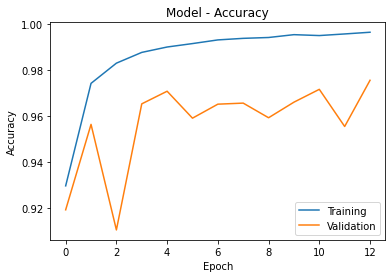

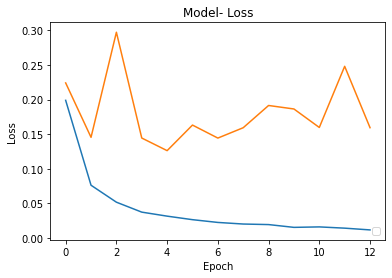

In [ ]:
evaluate_model(historyFFT,X_test_FFTarea,y_test_FFTarea,modelFFT)
y_pred_FFTarea=modelFFT.predict(X_test_FFTarea)
plt.show()

Normalized confusion matrix


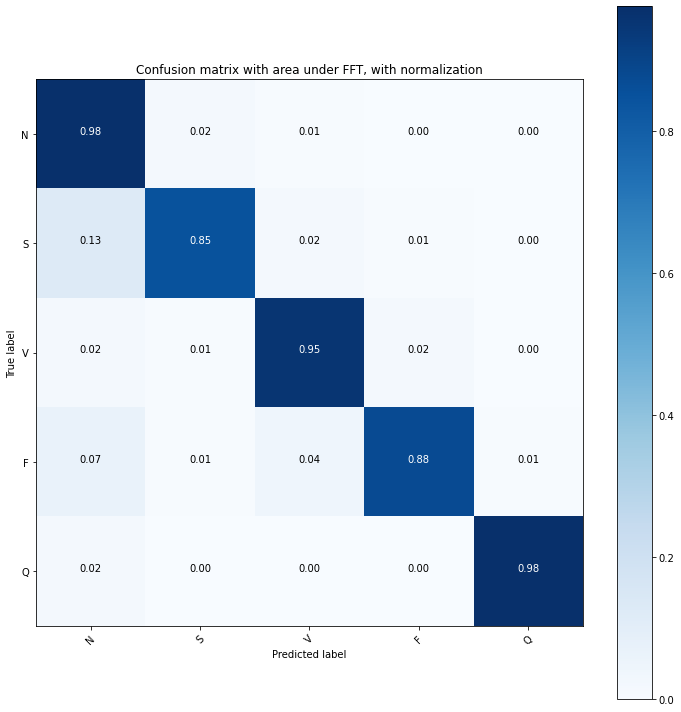

In [ ]:
# Compute confusion matrix
cnf_matrixFFT = confusion_matrix(y_test_FFTarea.argmax(axis=1), y_pred_FFTarea.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrixFFT, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix with area under FFT, with normalization')
plt.show()

Now, using the data sets from Kaggle (originally from MIT-BIH arrhythmia dataset) I'll test the network.

I'll calculate the new parameter: area under the FFT, and will add it to the data set

In [ ]:
#Organizing the new data set and adding the new parameter
from numpy import trapz
new_areaFFTnormal = []
new_areaFFT = []

#For normal beats:
class_0new_areaFFTnormal = train_df.iloc[0,5:70:1]
dt_0new_areaFFTnormal = 65/len(class_0new_areaFFTnormal)
t0new_areaFFTnormal = np.arange(0, 65, dt_0new_areaFFTnormal)

for i in range (normal.shape[0]):
    if (normal.iloc[i , 187] == 0):
     new0FFTnormal = normal.iloc[i,5:70:1]
     fft_data0_new = np.fft.fftshift(np.fft.fft(np.fft.fftshift(new0FFTnormal)))*dt_0new_areaFFTnormal
     freq_data0_new = np.arange(-1/(2*dt_0new_areaFFTnormal),1/(2*dt_0new_areaFFTnormal),1/(dt_0new_areaFFTnormal*t0new_areaFFTnormal.size)) 
     area_data0_new = trapz(abs(fft_data0_new), dx=dt_0new_areaFFTnormal)
     new_areaFFTnormal.append(area_data0_new)
print("Class 0:", len(new_areaFFTnormal), "must be equal to number of data in normal = ", normal.shape[0])

#For the file with the abnormal records:
class_1new_areaFFTnormal = train_df.iloc[20001,5:50:1]
dt_1new_areaFFTnormal = 65/len(class_1new_areaFFTnormal)
t1new_areaFFTnormal = np.arange(0, 65, dt_1new_areaFFTnormal)

for i in range (abnormal.shape[0]): 
     new1FFTnormal = abnormal.iloc[i,5:50:1] 
     fft_data1_new = np.fft.fftshift(np.fft.fft(np.fft.fftshift(new1FFTnormal)))*dt_1new_areaFFTnormal
     freq_data1_new = np.arange(-1/(2*dt_1new_areaFFTnormal),1/(2*dt_1new_areaFFTnormal),1/(dt_1new_areaFFTnormal*t1new_areaFFTnormal.size)) 
     area_data1_new = trapz(abs(fft_data1_new), dx=dt_1new_areaFFTnormal)
     new_areaFFT.append(area_data1_new)
print("Class 1:", len(new_areaFFT), "must be equal to number of data in normal = ", abnormal.shape[0])

Class 0: 4046 must be equal to number of data in normal =  4046
Class 1: 10506 must be equal to number of data in normal =  10506


In [ ]:
#Adding the parameter to a new set of data for testing the network, it has to be addded before 
#the column of classes, i.e. it will be the new column 187
new_data_areaFFTnormal1 = normal.copy() # .copy() needs to be added so that the original dataframe doesn't change
new_data_areaFFTnormal1.insert(187, '187', new_areaFFTnormal)

#We have to modify the name of the columns, because after the last change the columns 188 and 189 have the names
#188 and 187 respectively
Names_column = np.arange(189)
new_data_areaFFTnormal1.columns = Names_column

#Now for the data from abnormal:
new_data_areaFFTabnormal = abnormal.copy() # .copy() needs to be added so that the original dataframe doesn't change
new_data_areaFFTabnormal.insert(187, '187', new_areaFFT)

Names_column = np.arange(189)
new_data_areaFFTabnormal.columns = Names_column

In [ ]:
#Preparing the data for runing the network 
#Now the classes are in column '188'
X_newdata_areaFFT_normal=new_data_areaFFTnormal1.iloc[:,:187].values
X_newdata_areaFFT_abnormal=new_data_areaFFTabnormal.iloc[:,:187].values



X_newdata_areaFFT_normal = X_newdata_areaFFT_normal.reshape(len(X_newdata_areaFFT_normal), X_newdata_areaFFT_normal.shape[1],1)
X_newdata_areaFFT_abnormal = X_newdata_areaFFT_abnormal.reshape(len(X_newdata_areaFFT_abnormal), X_newdata_areaFFT_abnormal.shape[1],1)

In [ ]:
#NOW, to the network!!!
newdata_prediction_normalFFT = modelFFT.predict(X_newdata_areaFFT_normal)
datapredictionnormalFFT=newdata_prediction_normalFFT.astype(int)

newdata_prediction_abnormalFFT = modelFFT.predict(X_newdata_areaFFT_abnormal)
datapredictionabnormalFFT =newdata_prediction_abnormalFFT.astype(int)


In [ ]:
#How many the network predict right? (class 0, normal beats)
count_correctnormalFFT = 0
for i in range(len(datapredictionnormalFFT)):
  if datapredictionnormalFFT[i][0]==0:
    count_correctnormalFFT += 1

count_correct1FFT = 0

for i in range(len(datapredictionabnormalFFT)):
  if datapredictionabnormalFFT[i][0]==0:
    count_correct1FFT += 1

print("From ",len(normal),"data, the network classified correct as normal beats: ", count_correctnormalFFT)
percentagecorrectnormalFFT = count_correctnormalFFT*100/len(datapredictionnormalFFT)
percentagecorrectnormalFFT = round(percentagecorrectnormalFFT,2)
print("This is a percentage of success of: ",percentagecorrectnormalFFT,"%" )

print("From ",len(abnormal),"data, the network classified correct as supraventricular ectopic beats: ", count_correct1FFT)
percentagecorrect1FFT = count_correct1FFT*100/len(datapredictionabnormalFFT)
percentagecorrect1FFT = round(percentagecorrect1FFT,2)
print("This is a percentage of success of: ",percentagecorrect1FFT,"%" )

From  4046 data, the network classified correct as normal beats:  3161
This is a percentage of success of:  78.13 %
From  10506 data, the network classified correct as supraventricular ectopic beats:  9122
This is a percentage of success of:  86.83 %


# Now, analizing the area under the curve of the beats and adding this as a parameter for training to the original data:

In [ ]:
#First for train_df
from numpy import trapz
beat_areatrain = []

#For class 0: Normal beats
class_0beat = train_df.iloc[0,5:70:1]
dt_0beat = 65/len(class_0beat)
t0beat = np.arange(0, 65, dt_0beat)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 0):
     data0beat = train_df.iloc[i,5:70:1]
     area_data0beat = trapz(abs(data0beat), dx=dt_0beat)
     beat_areatrain.append(area_data0beat)
print("clase 0:", len(beat_areatrain))

#For class 1: Supraventricular ectopic beats
class_1beat = train_df.iloc[20001,5:50:1]
dt_1beat = 45/len(class_1beat)
t1beat = np.arange(0, 45, dt_1beat)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 1):
     data1beat = train_df.iloc[i,5:50:1] 
     area_data1beat = trapz(abs(data1beat), dx=dt_1beat)
     beat_areatrain.append(area_data1beat)
print("clase 1:", len(beat_areatrain))

#For class 2: Ventricular ectopic beats 
class_2beat = train_df.iloc[40001,5:50:1]
dt_2beat= 45/len(class_2beat)
t2beat = np.arange(0, 45, dt_2beat)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 2):
     data2beat = train_df.iloc[i,5:50:1]
     area_data2beat = trapz(abs(data2beat), dx=dt_2beat)
     beat_areatrain.append(area_data2beat)
print("clase 2:", len(beat_areatrain))

#For class 3: Fusion Beats
class_3beat = train_df.iloc[60001,15:60:1]
dt_3beat= 45/len(class_3beat)
t3beat = np.arange(0, 45, dt_3beat)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 3):
     data3beat = train_df.iloc[i,15:60:1] 
     area_data3beat = trapz(abs(data3beat), dx=dt_3beat)
     beat_areatrain.append(area_data3beat)
print("clase 3:", len(beat_areatrain))


#For class 4: Unknown Beats
class_4beat = train_df.iloc[80001,15:50:1]
dt_4beat= 35/len(class_4beat)
t4beat = np.arange(0, 35, dt_4beat)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 4):
     data4beat = train_df.iloc[i,15:50:1]
     area_data4beat = trapz(abs(data4beat), dx=dt_4beat)
     beat_areatrain.append(area_data4beat)

print("clase 4:", len(beat_areatrain))

clase 0: 20000
clase 1: 40000
clase 2: 60000
clase 3: 80000
clase 4: 100000


In [ ]:
#Adding the parameter to a new set of data for training, it has to be addded before 
#the column of classes, i.e. it will be the new column 187
train_df_beatarea = train_df.copy() # .copy() needs to be added so that the original dataframe doesn't change
train_df_beatarea.insert(187, '187', beat_areatrain)

#We have to modify the name of the columns, because after the last change the columns 188 and 189 have the names
#188 and 187 respectively
Names_column = np.arange(189)
train_df_beatarea.columns = Names_column

In [ ]:
#Now for test_df
beat_areatest = []

#For class 0: Normal beats
class_0beat = train_df.iloc[0,5:70:1]
dt_0beat = 65/len(class_0beat)
t0beat = np.arange(0, 65, dt_0beat)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 0):
     data0_testbeat = test_df.iloc[i,5:70:1]
     area_data0_testbeat = trapz(abs(data0_testbeat), dx=dt_0beat)
     beat_areatest.append(area_data0_testbeat)
print("clase 0:", len(beat_areatest))

#For class 1: Supraventricular ectopic beats
class_1beat = train_df.iloc[20001,5:50:1]
dt_1beat = 45/len(class_1beat)
t1beat = np.arange(0, 45, dt_1beat)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 1):
     data1_testbeat = test_df.iloc[i,5:50:1]
     area_data1_testbeat = trapz(abs(data1_testbeat), dx=dt_1beat)
     beat_areatest.append(area_data1_testbeat)
print("clase 1:", len(beat_areatest))

#For class 2: Ventricular ectopic beats 
class_2beat = train_df.iloc[40001,5:50:1]
dt_2beat= 45/len(class_2beat)
t2beat = np.arange(0, 45, dt_2beat)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 2):
     data2_testbeat = test_df.iloc[i,5:50:1]
     area_data2_testbeat = trapz(abs(data2_testbeat), dx=dt_2beat)
     beat_areatest.append(area_data2_testbeat)
print("clase 2:", len(beat_areatest))

#For class 3: Fusion Beats
class_3beat = train_df.iloc[60001,15:60:1]
dt_3beat = 45/len(class_3beat)
t3beat = np.arange(0, 45, dt_3beat)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 3):
     data3_testbeat = test_df.iloc[i,15:60:1] 
     area_data3_testbeat = trapz(abs(data3_testbeat), dx=dt_3beat)
     beat_areatest.append(area_data3_testbeat)
print("clase 3:", len(beat_areatest))


#For class 4: Unknown Beats
class_4beat = train_df.iloc[80001,15:50:1]
dt_4beat = 35/len(class_4beat)
t4beat = np.arange(0, 35, dt_4beat)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 4):
     data4_testbeat = test_df.iloc[i,15:50:1]
     area_data4_testbeat = trapz(abs(data4_testbeat), dx=dt_4beat)
     beat_areatest.append(area_data4_testbeat)

print("clase 4:", len(beat_areatest))

clase 0: 18118
clase 1: 18674
clase 2: 20122
clase 3: 20284
clase 4: 21892


In [ ]:
#Adding the parameter to a new set of data for testing, it has to be addded before 
#the column of classes, i.e. it will be the new column 187
test_df_beatarea = test_df.copy() # .copy() needs to be added so that the original dataframe doesn't change
test_df_beatarea.insert(187, '187', beat_areatest)

#We have to modify the name of the columns, because after the last change the columns 188 and 189 have the names
#188 and 187 respectively
Names_column = np.arange(189)
test_df_beatarea.columns = Names_column

In [ ]:
#Preparing the data for runing the network again with the new parameter
#Now the classes are in column '188'
target_train_beatarea=train_df_beatarea[188]
target_test_beatarea=test_df_beatarea[188]
y_train_beatarea=to_categorical(target_train_beatarea)
y_test_beatarea=to_categorical(target_test_beatarea)

X_train_beatarea=train_df_beatarea.iloc[:,:187].values
X_test_beatarea=test_df_beatarea.iloc[:,:187].values
X_train_beatarea = X_train_beatarea.reshape(len(X_train_beatarea), X_train_beatarea.shape[1],1)
X_test_beatarea = X_test_beatarea.reshape(len(X_test_beatarea), X_test_beatarea.shape[1],1)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
#from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

modelbeat,historybeat=network(X_train_beatarea,y_train_beatarea,X_test_beatarea,y_test_beatarea)

Epoch 1/40
3125/3125 [==============================] - 111s 35ms/step - loss: 0.1927 - accuracy: 0.9310 - val_loss: 0.3283 - val_accuracy: 0.8917
Epoch 2/40
3125/3125 [==============================] - 110s 35ms/step - loss: 0.0747 - accuracy: 0.9735 - val_loss: 0.3312 - val_accuracy: 0.8974
Epoch 3/40
3125/3125 [==============================] - 121s 39ms/step - loss: 0.0506 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9670
Epoch 4/40
3125/3125 [==============================] - 123s 39ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.1612 - val_accuracy: 0.9577
Epoch 5/40
3125/3125 [==============================] - 130s 42ms/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.1243 - val_accuracy: 0.9695
Epoch 6/40
3125/3125 [==============================] - 126s 40ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.1470 - val_accuracy: 0.9696
Epoch 7/40
3125/3125 [==============================] - 124s 40ms/step - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0

Accuracy: 96.70%


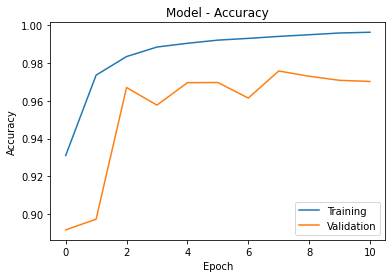

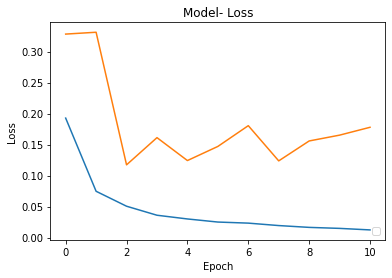

In [ ]:
evaluate_model(historybeat,X_test_beatarea,y_test_beatarea,modelbeat)
y_pred_beatarea=modelbeat.predict(X_test_beatarea)
plt.show()

Normalized confusion matrix


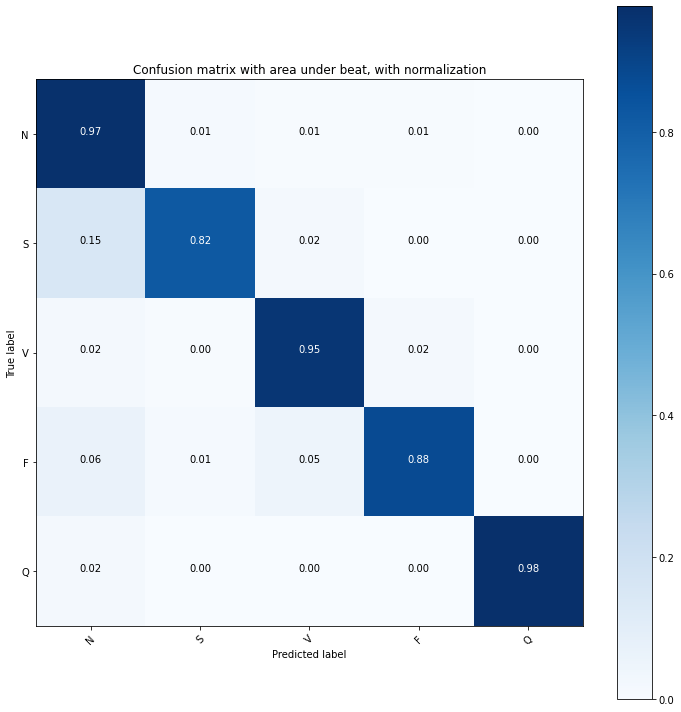

In [ ]:
#Compute confusion matrix
cnf_matrixbeat = confusion_matrix(y_test_beatarea.argmax(axis=1), y_pred_beatarea.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrixbeat, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix with area under beat, with normalization')
plt.show()

Now, using the data sets from Kaggle (originally from MIT-BIH arrhythmia dataset) I'll test the network.

I'll calculate the new parameter: area under the curve beat, and will add it to the data set

In [ ]:
#Organizing the new data set and adding the new parameter
from numpy import trapz
new_beat_areanormal = []
new_beat_area = []

#For normal beats:
class_0new_areanormal = train_df.iloc[0,5:70:1]
dt_0new_areanormal = 65/len(class_0new_areanormal)
t0new_areanormal = np.arange(0, 65, dt_0new_areanormal)

for i in range (normal.shape[0]):
    if (normal.iloc[i , 187] == 0):
     new0beatnormal = normal.iloc[i,5:70:1]
     area_new0beatnormal = trapz(new0beatnormal, dx=dt_0new_areanormal)
     new_beat_areanormal.append(area_new0beatnormal)
print("Class 0:", len(new_beat_areanormal), "must be equal to number of data in normal = ", normal.shape[0])

#For the file with the abnormal records:
class_1new_areaabnormal = train_df.iloc[20001,5:50:1]
dt_1new_areaabnormal = 45/len(class_1new_areaabnormal)
t1new_areaabnormal = np.arange(0, 45, dt_1new_areaabnormal)

for i in range (abnormal.shape[0]):
     new1beatabnormal = abnormal.iloc[i,5:50:1] 
     area_new1beatabnormal = trapz(new1beatabnormal, dx=dt_1new_areaabnormal)
     new_beat_area.append(area_new1beatabnormal)

print("Class 1:", len(new_beat_area), "must be equal to number of data in abnormal = ", abnormal.shape[0])

Class 0: 4046 must be equal to number of data in normal =  4046
Class 1: 10506 must be equal to number of data in abnormal =  10506


In [ ]:
#Adding the parameter to a new set of data for testing the network, it has to be addded before 
#the column of classes, i.e. it will be the new column 187
new_data_areanormal1 = normal.copy() # .copy() needs to be added so that the original dataframe doesn't change
new_data_areanormal1.insert(187, '187', new_beat_areanormal)

#We have to modify the name of the columns, because after the last change the columns 188 and 189 have the names
#188 and 187 respectively
Names_column = np.arange(189)
new_data_areanormal1.columns = Names_column

#Now for the data from abnormal:
new_data_areaabnormal = abnormal.copy() # .copy() needs to be added so that the original dataframe doesn't change
new_data_areaabnormal.insert(187, '187', new_beat_area)

Names_column = np.arange(189)
new_data_areaabnormal.columns = Names_column

In [ ]:
#Preparing the data for runing the network 
#Now the classes are in column '188'
X_newdata_beatarea_normal=new_data_areanormal1.iloc[:,:187].values
X_newdata_beatarea_abnormal=new_data_areaabnormal.iloc[:,:187].values



X_newdata_beatarea_normal = X_newdata_beatarea_normal.reshape(len(X_newdata_beatarea_normal), X_newdata_beatarea_normal.shape[1],1)
X_newdata_beatarea_abnormal = X_newdata_beatarea_abnormal.reshape(len(X_newdata_beatarea_abnormal), X_newdata_beatarea_abnormal.shape[1],1)

In [ ]:
#NOW, to the network!!!
newdata_prediction_areanormal = modelbeat.predict(X_newdata_beatarea_normal)
dataprediction_areanormal=newdata_prediction_areanormal.astype(int)

newdata_prediction_areaabnormal = modelbeat.predict(X_newdata_beatarea_abnormal)
dataprediction_areaabnormal=newdata_prediction_areaabnormal.astype(int)


In [ ]:
#How many the network predict right? (class 0, normal beats)
count_correct_areanormal = 0
for i in range(len(dataprediction_areanormal)):
  if dataprediction_areanormal[i][0]==0:
    count_correct_areanormal += 1

count_correct1area = 0

for i in range(len(dataprediction_areaabnormal)):
  if dataprediction_areaabnormal[i][0]==0:
    count_correct1area += 1

print("From ",len(normal),"data, the network classified correct as normal beats: ", count_correct_areanormal)
percentagecorrect_areanormal = count_correct_areanormal*100/len(dataprediction_areanormal)
percentagecorrect_areanormal = round(percentagecorrect_areanormal,2)
print("This is a percentage of success of: ",percentagecorrect_areanormal,"%" )

print("From ",len(abnormal),"data, the network classified correct as supraventricular ectopic beats: ", count_correct1area)
percentagecorrect1_area = count_correct1area*100/len(dataprediction_areaabnormal)
percentagecorrect1_area = round(percentagecorrect1_area,2)
print("This is a percentage of success of: ",percentagecorrect1_area,"%" )

From  4046 data, the network classified correct as normal beats:  3855
This is a percentage of success of:  95.28 %
From  10506 data, the network classified correct as supraventricular ectopic beats:  9777
This is a percentage of success of:  93.06 %


#Now let's find the maximum amplitude in the beats, and analyze the network performance with this new parameter

In [ ]:
#First for train_df
from numpy import trapz
beat_maxtrain = []

#For class 0: Normal beats
class_0maxtrain = train_df.iloc[0,5:70:1]
dt_0maxtrain = 65/len(class_0maxtrain)
t0maxtrain = np.arange(0, 65, dt_0maxtrain)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 0):
     data0maxtrain = train_df.iloc[i,5:70:1].max()
     beat_maxtrain.append(data0maxtrain)
print("clase 0:", len(beat_maxtrain))

#For class 1: Supraventricular ectopic beats
class_1maxtrain = train_df.iloc[20001,5:50:1]
dt_1maxtrain = 45/len(class_1maxtrain)
t1maxtrain = np.arange(0, 45, dt_1maxtrain)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 1):
     data1maxtrain = train_df.iloc[i,5:50:1].max() 
     beat_maxtrain.append(data1maxtrain)
print("clase 1:", len(beat_maxtrain))

#For class 2: Ventricular ectopic beats 
class_2maxtrain = train_df.iloc[40001,5:50:1]
dt_2maxtrain= 45/len(class_2maxtrain)
t2maxtrain = np.arange(0, 45, dt_2maxtrain)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 2):
     data2maxtrain = train_df.iloc[i,5:50:1].max()
     beat_maxtrain.append(data2maxtrain)
print("clase 2:", len(beat_maxtrain))

#For class 3: Fusion Beats
class_3maxtrain = train_df.iloc[60001,15:60:1]
dt_3maxtrain= 45/len(class_3maxtrain)
t3maxtrain = np.arange(0, 45, dt_3maxtrain)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 3):
     data3maxtrain = train_df.iloc[i,15:60:1].max()
     beat_maxtrain.append(data3maxtrain)
print("clase 3:", len(beat_maxtrain))


#For class 4: Unknown Beats
class_4maxtrain = train_df.iloc[80001,15:50:1]
dt_4maxtrain= 35/len(class_4maxtrain)
t4maxtrain = np.arange(0, 35, dt_4maxtrain)

for i in range (train_df.shape[0]):
    if (train_df.iloc[i , 187] == 4):
     data4maxtrain = train_df.iloc[i,15:50:1].max()
     beat_maxtrain.append(data4maxtrain)

print("clase 4:", len(beat_maxtrain))

clase 0: 20000
clase 1: 40000
clase 2: 60000
clase 3: 80000
clase 4: 100000


In [ ]:
#Adding the parameter to a new set of data for training, it has to be addded before 
#the column of classes, i.e. it will be the new column 187
train_df_maxtrain = train_df.copy() # .copy() needs to be added so that the original dataframe doesn't change
train_df_maxtrain.insert(187, '187', beat_maxtrain)

#We have to modify the name of the columns, because after the last change the columns 188 and 189 have the names
#188 and 187 respectively
Names_column = np.arange(189)
train_df_maxtrain.columns = Names_column

In [ ]:
#Now for test_df
beat_maxtest = []

#For class 0: Normal beats
class_0maxtest = train_df.iloc[0,5:70:1]
dt_0maxtest = 65/len(class_0maxtest)
t0maxtest = np.arange(0, 65, dt_0maxtest)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 0):
     data0_maxtest = test_df.iloc[i,5:70:1].max()
     beat_maxtest.append(data0_maxtest)
print("clase 0:", len(beat_maxtest))

#For class 1: Supraventricular ectopic beats
class_1maxtest = train_df.iloc[20001,5:50:1]
dt_1maxtest = 45/len(class_1maxtest)
t1maxtest = np.arange(0, 45, dt_1maxtest)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 1):
     data1_maxtest = test_df.iloc[i,5:50:1].max()
     beat_maxtest.append(data1_maxtest)
print("clase 1:", len(beat_maxtest))

#For class 2: Ventricular ectopic beats 
class_2maxtest = train_df.iloc[40001,5:50:1]
dt_2maxtest= 45/len(class_2maxtest)
t2maxtest = np.arange(0, 45, dt_2maxtest)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 2):
     data2_maxtest = test_df.iloc[i,5:50:1].max()
     beat_maxtest.append(data2_maxtest)
print("clase 2:", len(beat_maxtest))

#For class 3: Fusion Beats
class_3maxtest = train_df.iloc[60001,15:60:1]
dt_3maxtest = 45/len(class_3maxtest)
t3beat = np.arange(0, 45, dt_3maxtest)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 3):
     data3_maxtest = test_df.iloc[i,15:60:1].max()
     beat_maxtest.append(data3_maxtest)
print("clase 3:", len(beat_maxtest))


#For class 4: Unknown Beats
class_maxtest = train_df.iloc[80001,15:50:1]
dt_4maxtest = 35/len(class_maxtest)
t4maxtest = np.arange(0, 35, dt_4maxtest)

for i in range (test_df.shape[0]):
    if (test_df.iloc[i , 187] == 4):
     data4_maxtest = test_df.iloc[i,15:50:1].max()
     beat_maxtest.append(data4_maxtest)

print("clase 4:", len(beat_maxtest))

clase 0: 18118
clase 1: 18674
clase 2: 20122
clase 3: 20284
clase 4: 21892


In [ ]:
#Adding the parameter to a new set of data for testing, it has to be addded before 
#the column of classes, i.e. it will be the new column 187
test_df_maxtest = test_df.copy() # .copy() needs to be added so that the original dataframe doesn't change
test_df_maxtest.insert(187, '187', beat_maxtest)

#We have to modify the name of the columns, because after the last change the columns 188 and 189 have the names
#188 and 187 respectively
Names_column = np.arange(189)
test_df_maxtest.columns = Names_column

In [ ]:
#Preparing the data for runing the network again with the new parameter
#Now the classes are in column '188'
target_train_maxtrain=train_df_maxtrain[188]
target_test_maxtest=test_df_maxtest[188]
y_train_maxtrain=to_categorical(target_train_maxtrain)
y_test_maxtest=to_categorical(target_test_maxtest)

X_train_maxtrain=train_df_maxtrain.iloc[:,:187].values
X_test_maxtest=test_df_maxtest.iloc[:,:187].values
X_train_maxtrain = X_train_maxtrain.reshape(len(X_train_maxtrain), X_train_maxtrain.shape[1],1)
X_test_maxtest = X_test_maxtest.reshape(len(X_test_maxtest), X_test_maxtest.shape[1],1)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
#from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

modelmax,historymax=network(X_train_maxtrain,y_train_maxtrain,X_test_maxtest,y_test_maxtest)

Epoch 1/40
3125/3125 [==============================] - 114s 36ms/step - loss: 0.1846 - accuracy: 0.9346 - val_loss: 0.1752 - val_accuracy: 0.9438
Epoch 2/40
3125/3125 [==============================] - 118s 38ms/step - loss: 0.0712 - accuracy: 0.9764 - val_loss: 0.1264 - val_accuracy: 0.9643
Epoch 3/40
3125/3125 [==============================] - 118s 38ms/step - loss: 0.0480 - accuracy: 0.9840 - val_loss: 0.1365 - val_accuracy: 0.9609
Epoch 4/40
3125/3125 [==============================] - 115s 37ms/step - loss: 0.0377 - accuracy: 0.9874 - val_loss: 0.1262 - val_accuracy: 0.9659
Epoch 5/40
3125/3125 [==============================] - 119s 38ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.1621 - val_accuracy: 0.9634
Epoch 6/40
3125/3125 [==============================] - 120s 38ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.1292 - val_accuracy: 0.9704
Epoch 7/40
3125/3125 [==============================] - 117s 37ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0

Accuracy: 96.59%


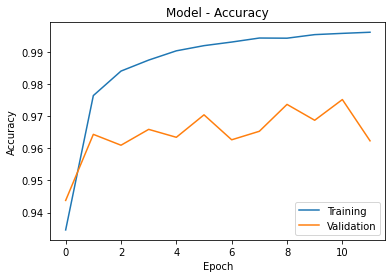

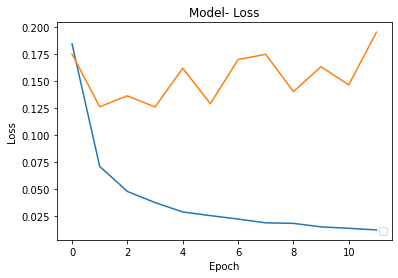

In [ ]:
evaluate_model(historymax,X_test_maxtest,y_test_maxtest,modelmax)
y_pred_max=modelmax.predict(X_test_maxtest)
plt.show()

Normalized confusion matrix


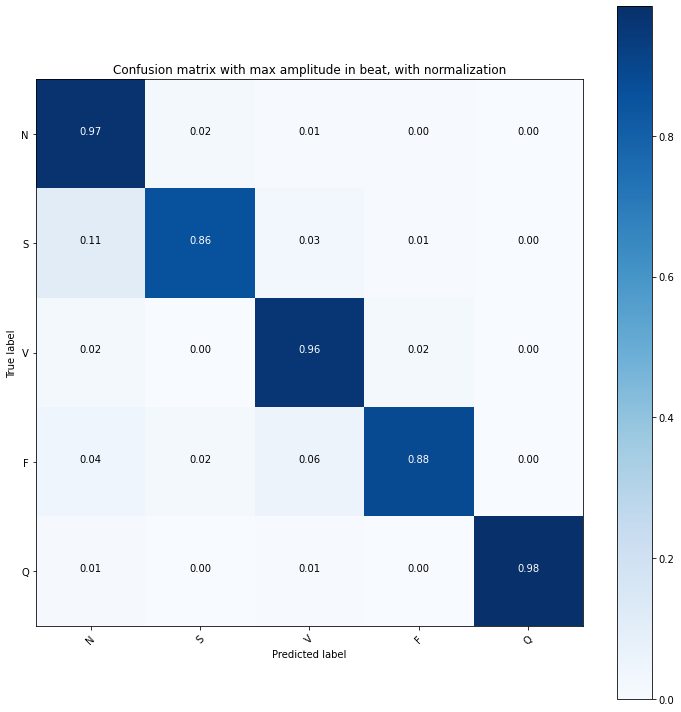

In [ ]:
#Compute confusion matrix
cnf_matrixmax = confusion_matrix(y_test_maxtest.argmax(axis=1), y_pred_max.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrixmax, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix with max amplitude in beat, with normalization')
plt.show()

Now, using the data sets from Kaggle (originally from MIT-BIH arrhythmia dataset) I'll test the network.

I'll calculate the new parameter: maximum amplitude of beat, and will add it to the data set

In [ ]:
#Organizing the new data set and adding the new parameter
from numpy import trapz
new_beat_maxnormal = []
new_beat_max = []

#For normal beats:
class_0new_maxnormal = train_df.iloc[0,5:70:1]
dt_0new_maxnormal = 65/len(class_0new_maxnormal)
t0new_maxnormal = np.arange(0, 65, dt_0new_maxnormal)

for i in range (normal.shape[0]):
    if (normal.iloc[i , 187] == 0):
     new0beatmaxnormal = normal.iloc[i,5:70:1].max
     new_beat_maxnormal.append(new0beatmaxnormal)
print("Class 0:", len(new_beat_maxnormal), "must be equal to number of data in normal = ", normal.shape[0])

#For the file with the abnormal records:
class_1new_maxnormal = train_df.iloc[20001,5:50:1]
dt_1new_maxnormal = 45/len(class_1new_maxnormal)
t1new_maxnormal = np.arange(0, 45, dt_1new_maxnormal)

for i in range (abnormal.shape[0]):
     new1beatmax = abnormal.iloc[i,5:50:1].max
     new_beat_max.append(new1beatmax)

print("Class 1:", len(new_beat_max), "must be equal to number of data in abnormal = ", abnormal.shape[0])

Class 0: 4046 must be equal to number of data in normal =  4046
Class 1: 10506 must be equal to number of data in abnormal =  10506


In [ ]:
#Adding the parameter to a new set of data for testing the network, it has to be addded before 
#the column of classes, i.e. it will be the new column 187
new_data_maxnormal1 = normal.copy() # .copy() needs to be added so that the original dataframe doesn't change
new_data_maxnormal1.insert(187, '187', new_beat_maxnormal)

#We have to modify the name of the columns, because after the last change the columns 188 and 189 have the names
#188 and 187 respectively
Names_column = np.arange(189)
new_data_maxnormal1.columns = Names_column

#Now for the data from abnormal:
new_data_maxabnormal = abnormal.copy() # .copy() needs to be added so that the original dataframe doesn't change
new_data_maxabnormal.insert(187, '187', new_beat_max)

Names_column = np.arange(189)
new_data_maxabnormal.columns = Names_column

In [ ]:
#Preparing the data for runing the network 
#Now the classes are in column '188'
X_newdata_beatmax_normal=new_data_maxnormal1.iloc[:,:187].values
X_newdata_beatmax_abnormal=new_data_maxabnormal.iloc[:,:187].values



X_newdata_beatmax_normal = X_newdata_beatmax_normal.reshape(len(X_newdata_beatmax_normal), X_newdata_beatmax_normal.shape[1],1)
X_newdata_beatmax_abnormal = X_newdata_beatmax_abnormal.reshape(len(X_newdata_beatmax_abnormal), X_newdata_beatmax_abnormal.shape[1],1)

In [ ]:
#NOW, to the network!!!
newdata_prediction_maxnormal = modelmax.predict(X_newdata_beatmax_normal)
dataprediction_maxnormal=newdata_prediction_maxnormal.astype(int)

newdata_prediction_maxabnormal = modelmax.predict(X_newdata_beatmax_abnormal)
dataprediction_maxabnormal=newdata_prediction_maxabnormal.astype(int)


In [ ]:
#How many the network predict right? (class 0, normal beats)
count_correctmaxnormal = 0
for i in range(len(dataprediction_maxnormal)):
  if dataprediction_maxnormal[i][0]==0:
    count_correctmaxnormal += 1

count_correct1max = 0

for i in range(len(dataprediction_maxabnormal)):
  if dataprediction_maxabnormal[i][0]==0:
    count_correct1max += 1

print("From ",len(normal),"data, the network classified correct as normal beats: ", count_correctmaxnormal)
percentagecorrect_maxnormal = count_correctmaxnormal*100/len(dataprediction_maxnormal)
percentagecorrect_maxnormal = round(percentagecorrect_maxnormal,2)
print("This is a percentage of success of: ",percentagecorrect_maxnormal,"%" )

print("From ",len(abnormal),"data, the network classified correct as supraventricular ectopic beats: ", count_correct1max)
percentage_correct1max = count_correct1*100/len(dataprediction_maxabnormal)
percentage_correct1max = round(percentage_correct1max,2)
print("This is a percentage of success of: ",percentagecorrect1,"%" )

From  4046 data, the network classified correct as normal beats:  3837
This is a percentage of success of:  94.83 %
From  10506 data, the network classified correct as supraventricular ectopic beats:  9754
This is a percentage of success of:  78.93 %
